In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In this Exercise, you are going to classify whether a given movie review is positive or negative.
you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [4]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

About Data: IMDB Dataset
Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

This data consists of two columns. - review - sentiment
Reviews are the statements given by users after watching the movie.
sentiment feature tells whether the given review is positive or negative.

In [5]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable

df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

#2. print the shape of the data
df.shape

#3. print top 5 datapoints
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative


In [6]:
#But before I do that, I am particularly interested in checking whether the data is balance 

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
target={'positive':1 , 'negative': 0}
df['sentiment_label']= df['sentiment'].map(target)
df.head()

,review,sentiment,sentiment_label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [16]:
X_train, X_test, y_train , y_test = train_test_split (
    df['review'],
    df['sentiment_label'],
  test_size=0.2 ,
    stratify=df.sentiment_label,
    random_state=2345
)

In [17]:
X_train.shape

(40000,)

In [11]:
y_train.shape

(40000,)

In [12]:
y_test.shape

(10000,)

Exercise-1

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.
Note:

use CountVectorizer for pre-processing the text.

use Random Forest as the classifier with estimators as 50 and criterion as entropy.

print the classification report.

References:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [22]:
clf=Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('Model',  RandomForestClassifier(n_estimators=50, criterion="entropy"))
])

#fit with X_train and y_train
clf.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Model',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [24]:
y_preds= clf.predict(X_test)

In [25]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5042
           1       0.83      0.84      0.84      4958

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Exercise-2

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..
Note:

use CountVectorizer for pre-processing the text.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean'.
print the classification report.
References:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [26]:
clf= Pipeline([
    ('Vectorizer',CountVectorizer()),
    ('model',KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [27]:
y_preds=clf.predict(X_test)

In [28]:
print(classification_report(y_preds,y_test))


              precision    recall  f1-score   support

           0       0.67      0.65      0.66      5134
           1       0.64      0.66      0.65      4866

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



Exercise-3

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..
Note:

use CountVectorizer for pre-processing the text.
use Multinomial Naive Bayes as the classifier.
print the classification report.
References:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [33]:
clf= Pipeline([
    ('Vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('model',MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB())])

In [34]:
y_predss=clf.predict(X_test)
print(classification_report(y_test, y_predss))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      5000
           1       0.89      0.87      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(58.222222222222214, 0.5, 'Truth')

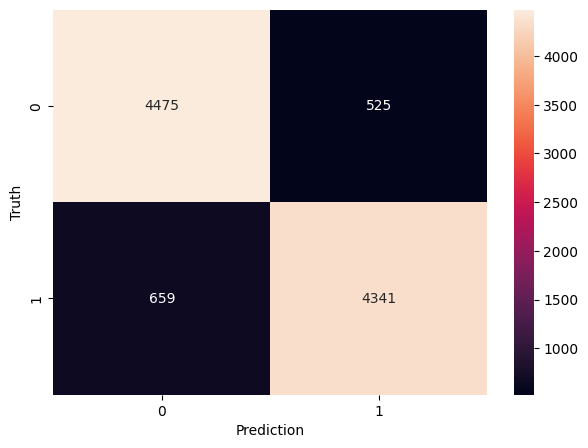

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predss)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [36]:
clf= Pipeline([
    ('Vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('model',MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('model', MultinomialNB())])

In [37]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5000
           1       0.90      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Text(58.222222222222214, 0.5, 'Truth')

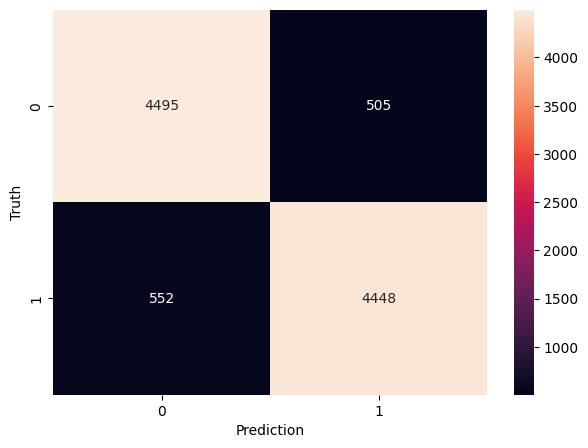

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [44]:
clf= Pipeline([
    ('Vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('model',MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('model', MultinomialNB())])

In [45]:
y_pred1=clf.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5000
           1       0.90      0.88      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Text(58.222222222222214, 0.5, 'Truth')

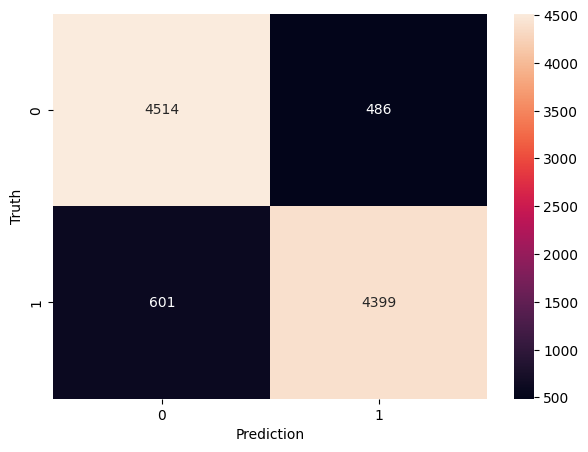

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [47]:
clf= Pipeline([
    ('Vectorizer',CountVectorizer(ngram_range=(1,4))),
    ('model',MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(1, 4))),
                ('model', MultinomialNB())])

In [48]:
y_pred2=clf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5000
           1       0.90      0.89      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Text(58.222222222222214, 0.5, 'Truth')

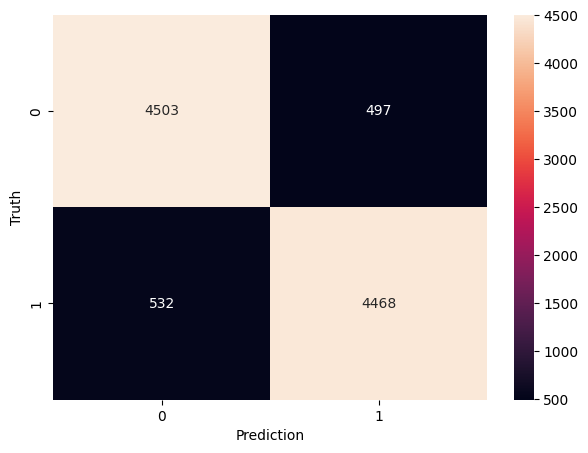

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

OBSERVATIONS
As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words.
Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.